# To predict diabetes using diabetes data

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline

### Load and review data

In [3]:
data = pd.read_csv("pima-data.csv")

In [4]:
data.shape

(768, 10)

In [5]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [6]:
data.isnull().values.any()

False

In [7]:
def plot_correlated(data, size=11):
    """
    Function to show plot of correlation between the data columns
    data : the data from pandas Dataframe
    size : the horizontal and vertical size of the plot
    
    Result : blue - cyan - yellow - red -darkred = less to more correlated columns = 0 ---- 1 
    """
    corr = data.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

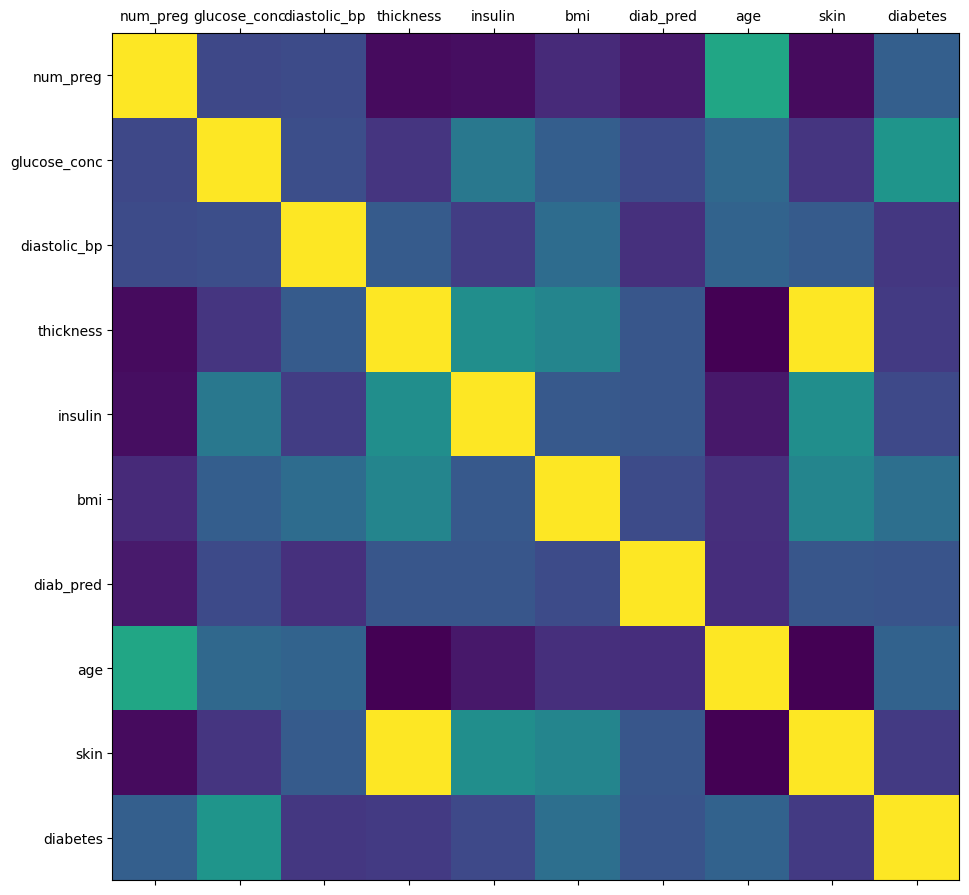

In [8]:
plot_correlated(data)

In [9]:
data.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [10]:
del data['thickness']

In [11]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,True
1,1,85,66,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,23.3,0.672,32,0.0000,True
3,1,89,66,94,28.1,0.167,21,0.9062,False
4,0,137,40,168,43.1,2.288,33,1.3790,True


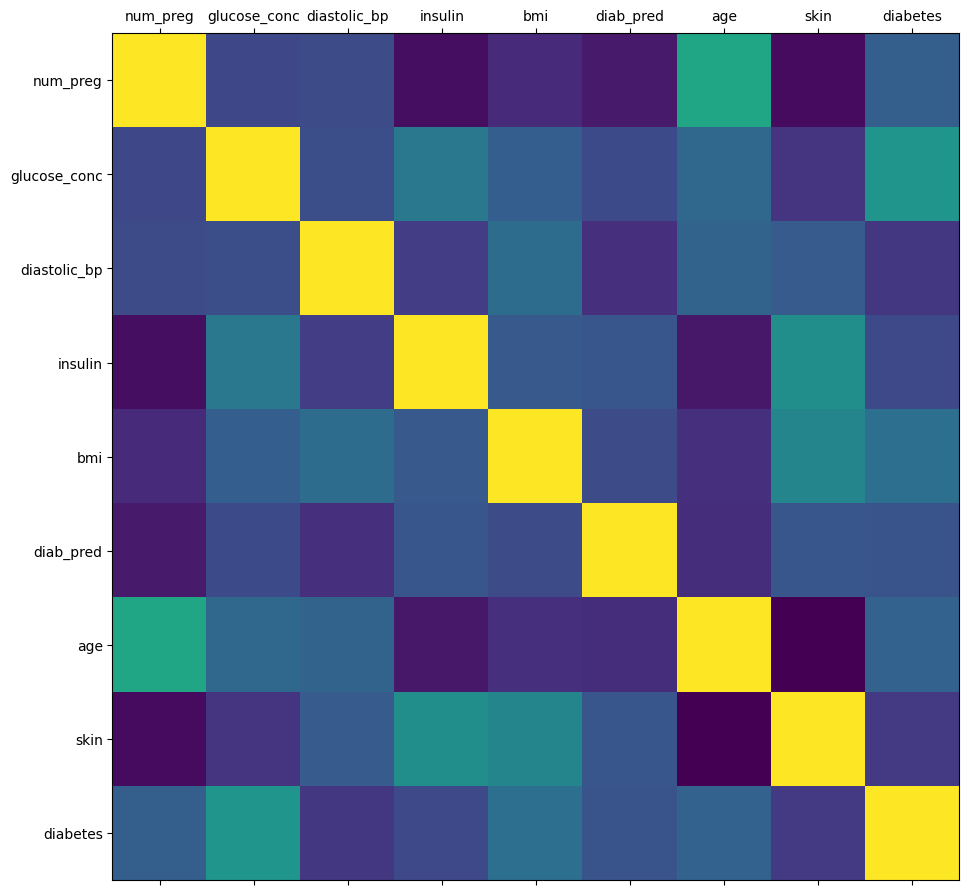

In [12]:
plot_correlated(data)

### Uniformying the data types of the features

In [13]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,True
1,1,85,66,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,23.3,0.672,32,0.0000,True
3,1,89,66,94,28.1,0.167,21,0.9062,False
4,0,137,40,168,43.1,2.288,33,1.3790,True


Changing the diabetes column data from boolean to number

In [14]:
diabetes_map = {True: 1, False: 0}

In [15]:
data['diabetes'] = data['diabetes'].map(diabetes_map)

In [16]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,1
1,1,85,66,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,23.3,0.672,32,0.0000,1
3,1,89,66,94,28.1,0.167,21,0.9062,0
4,0,137,40,168,43.1,2.288,33,1.3790,1


In [17]:
diabetes_true_count = len(data.loc[data['diabetes'] == True])

In [18]:
diabetes_false_count = len(data.loc[data['diabetes'] == False])

In [19]:
print("Diabetes - True : ", diabetes_true_count)
print("Diabetes - False : ", diabetes_false_count)

Diabetes - True :  268
Diabetes - False :  500


In [20]:
print("Diabetes - True : ", diabetes_true_count/data.shape[0]*100)
print("Diabetes - False : ", diabetes_false_count/data.shape[0]*100)

Diabetes - True :  34.89583333333333
Diabetes - False :  65.10416666666666


### Splitting the data
70% for training and 30% for testing

In [21]:
from sklearn.model_selection import train_test_split
feature_columns = ['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi', 'diab_pred', 'age', 'skin']
predicted_class = ['diabetes']

X = data[feature_columns].values
y = data[predicted_class].values

split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state=10)

Checking the size of the test and train splits

In [22]:
X_train.shape[0]/X.shape[0] * 100



69.921875

In [23]:
X_test.shape[0]/X.shape[0] * 100

30.078125

Verifying if the prediction are splitted uniformly

In [24]:
print(len(data.loc[data['diabetes'] == 1]) / len(data.loc[data['diabetes']]) * 100)
print(len(data.loc[data['diabetes'] == 0]) / len(data.loc[data['diabetes']]) * 100)

34.89583333333333
65.10416666666666


In [25]:
print(len(y_train[y_train[:] == 1]) / len(y_train[y_train[:]]) * 100)
print(len(y_train[y_train[:] == 0]) / len(y_train[y_train[:]]) * 100)

33.70577281191806
66.29422718808193


In [26]:
print(len(y_test[y_test[:] == 1]) / len(y_test[y_test[:]]) * 100)
print(len(y_test[y_test[:] == 0]) / len(y_test[y_test[:]]) * 100)

37.66233766233766
62.33766233766234


### Post split data preparation

#### hidden missing values

In [27]:
data.head(5)

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,1
1,1,85,66,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,23.3,0.672,32,0.0000,1
3,1,89,66,94,28.1,0.167,21,0.9062,0
4,0,137,40,168,43.1,2.288,33,1.3790,1


Check how many other missing(zero) values are there...

In [28]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(data.loc[data['diastolic_bp'] == 0])))
print("number of rows missing insulin: {0}".format(len(data.loc[data['insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(data.loc[data['bmi'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(data.loc[data['diab_pred'] == 0])))
print("number of rows missing age: {0}".format(len(data.loc[data['age'] == 0])))
print("number of rows missing skin: {0}".format(len(data.loc[data['skin'] == 0])))

total number of rows : 768
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 227


In [29]:
from sklearn.impute import SimpleImputer
fill_0 = SimpleImputer(missing_values=0, strategy="mean", )
# To fill the missing values we import imputer and imputer function provides with the option of filling should be with mean,median,mode etc
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

# Training with Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

naive_model = GaussianNB()
naive_model.fit(X_train, y_train.ravel())

GaussianNB()

## Performance on training data

In [31]:
naive_predict_train_data = naive_model.predict(X_train)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_train, naive_predict_train_data)))

Accuracy = 0.756


## Performance on test data

In [32]:
naive_predict_test_data = naive_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, naive_predict_test_data)))

Accuracy = 0.732


#### Looking into more details

In [33]:
print("Confusion matrix")

print("{0}".format(metrics.confusion_matrix(y_test, naive_predict_test_data, labels=[1,0])))

print("Classification report")

print("{0}".format(metrics.classification_report(y_test, naive_predict_test_data, labels=[1,0])))


Confusion matrix
[[ 47  40]
 [ 22 122]]
Classification report
              precision    recall  f1-score   support

           1       0.68      0.54      0.60        87
           0       0.75      0.85      0.80       144

    accuracy                           0.73       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.73      0.72       231



# Random Forest



In [34]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=10)

#### Predicting Training data

In [35]:
rf_predict_train_data = random_forest_model.predict(X_train)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_train, rf_predict_train_data)))

Accuracy = 1.000


#### Predicting Test data

In [36]:
rf_predict_test_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, rf_predict_test_data)))

Accuracy = 0.736


#### Looking into more details

In [37]:
print("Confusion matrix")

print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test_data, labels=[1,0])))

print("Classification report")

print("{0}".format(metrics.classification_report(y_test, rf_predict_test_data, labels=[1,0])))

Confusion matrix
[[ 44  43]
 [ 18 126]]
Classification report
              precision    recall  f1-score   support

           1       0.71      0.51      0.59        87
           0       0.75      0.88      0.81       144

    accuracy                           0.74       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.73      0.74      0.72       231



# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(C=0.7, random_state=10)

log_reg_model.fit(X_train, y_train.ravel())

C:\Users\JAINAM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.7, random_state=10)

#### Predicting with train data

In [39]:
lr_predict_train_data = log_reg_model.predict(X_train)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_train, lr_predict_train_data)))

Accuracy = 0.784


#### Predicting with test data

In [40]:
lr_predict_test_data = log_reg_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, lr_predict_test_data)))

Accuracy = 0.749


### svm classifier

In [41]:
from sklearn import svm
scaler = StandardScaler()
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train,y_train)
scaler.fit(X_train)
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy score of the training data : ', training_data_accuracy*100)

# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

print('Accuracy score of the test data : ', test_data_accuracy*100)


C:\Users\JAINAM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score of the training data :  78.95716945996276
Accuracy score of the test data :  74.89177489177489


### Making the predictive system with choosing the model having one of the highest accuracy

In [42]:
input_data = (0, 126 , 70 , 80 , 32 ,0.4742,34,0.81)
# num_preg ,glucose_conc ,diastolic_bp ,insulin,bmi,diab_pred,age,skin

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[-1.45631604  0.11992445 -0.20469503 -0.84949556 -0.06624625  0.03395047
   0.07100127 -0.92882576]]
[0]
The person is not diabetic
